In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as patches
import seaborn
import json

In [2]:
f = open('info.json') 
info = json.load(f) 
   

In [3]:
ind_cell_df = pd.read_csv('cell_positions_h01.csv')
ind_cell_df

,Unnamed: 0,agglo_seg,x,y,z,type,layer,linfo,info
0,0,3195297945,2079128,1323232,42240,pyram,5,4,L4pyramidalneuron
1,1,4519199338,2090464,1369448,30720,pyram,5,4,L4pyramidalneuron
2,2,4475878153,2054304,1372584,42240,pyram,5,5,L5pyramidalneuron
3,3,3253775599,2037400,1313760,38400,pyram,5,4,L4pyramidalneuron
4,4,3719255305,2066464,1284832,46080,pyram,4,4,L4pyramidalneuron
...,...,...,...,...,...,...,...,...,...
15469,15764,102421008241,3051264,1538048,170181,pyram,3,a,layer-unclassifiedpyramidalneuron
15470,15765,102740886700,3020000,1600928,171666,inter,3,a,layer-unclassifiedneuroninterneuron
15471,15766,103526886623,3004320,1787360,168399,excit,3,a,layer-unclassifiedneuronexcitatory/spiny-with-...
15472,15767,105068475750,2641824,2152448,171105,uncla,4,a,layer-unclassifiedneuronunclassified-neuron


In [4]:
ind_cell_df = pd.read_csv('cell_positions_h01_full.csv')
ind_cell_df

,Unnamed: 0,agglo_seg,x,y,z,type,layer,linfo,info
0,0,3195297945,2079128,1323232,42240,pyram,5,4,L4pyramidalneuron
1,1,4519199338,2090464,1369448,30720,pyram,5,4,L4pyramidalneuron
2,2,4475878153,2054304,1372584,42240,pyram,5,5,L5pyramidalneuron
3,3,3253775599,2037400,1313760,38400,pyram,5,4,L4pyramidalneuron
4,4,3719255305,2066464,1284832,46080,pyram,4,4,L4pyramidalneuron
...,...,...,...,...,...,...,...,...,...
15562,15857,105024922427,2672384,2144896,172920,uncla,4,4,layer-unclassifiedneuronunclassified-neuron
15563,15858,105039521672,2687904,2147840,170775,uncla,4,4,layer-unclassifiedneuronunclassified-neuron
15564,15859,105068475750,2641824,2152448,171105,uncla,4,4,layer-unclassifiedneuronunclassified-neuron
15565,15860,105268101673,1651712,2204224,172029,uncla,7,7,layer-unclassifiedneuronunclassified-neuron


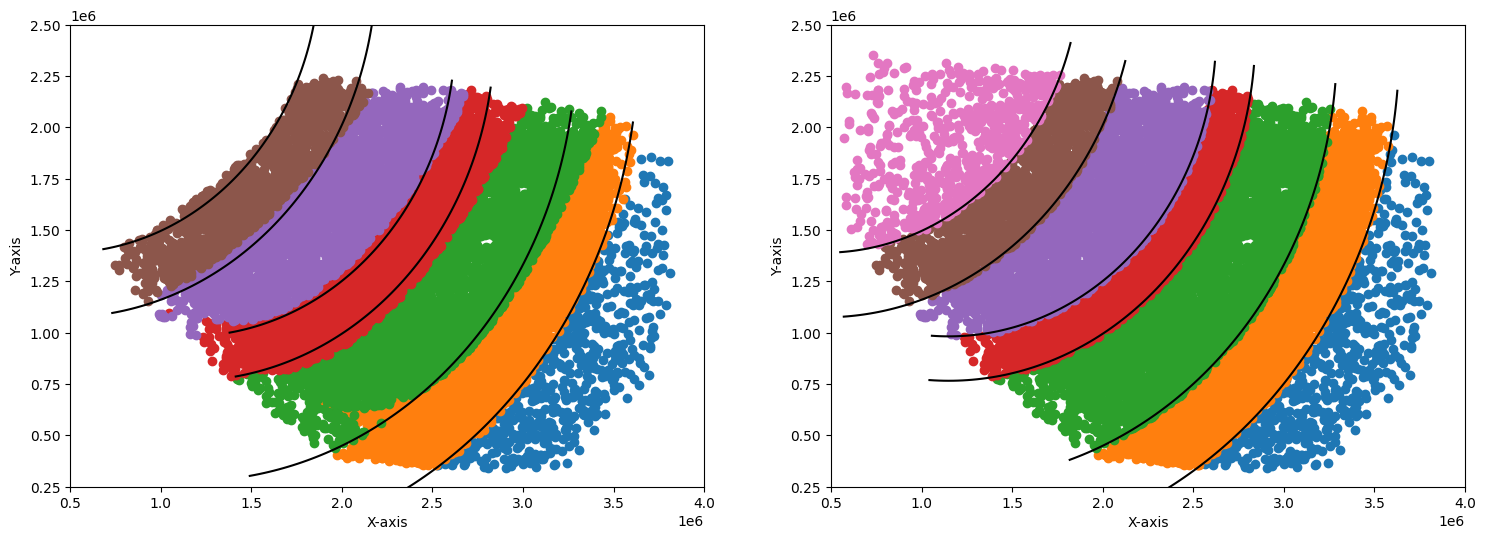

In [5]:
with open("h01/cortical_bounds_circles.json", "r") as f:
  bounds = json.load(f)

Fig = plt.figure(figsize=(18,6))

plt.subplot(1,2,1) # info label
plt.plot(ind_cell_df[ind_cell_df['linfo']==1]['x'].values,ind_cell_df[ind_cell_df['linfo']==1]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['linfo']==2]['x'].values,ind_cell_df[ind_cell_df['linfo']==2]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['linfo']==3]['x'].values,ind_cell_df[ind_cell_df['linfo']==3]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['linfo']==4]['x'].values,ind_cell_df[ind_cell_df['linfo']==4]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['linfo']==5]['x'].values,ind_cell_df[ind_cell_df['linfo']==5]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['linfo']==6]['x'].values,ind_cell_df[ind_cell_df['linfo']==6]['y'].values, 'o')
# plt.plot(ind_cell_df[ind_cell_df['linfo']=='M']['x'].values,ind_cell_df[ind_cell_df['linfo']=='M']['y'].values, 'o')
# plt.plot(ind_cell_df[ind_cell_df['linfo']=='a']['x'].values,ind_cell_df[ind_cell_df['linfo']=='a']['y'].values, 'o')

for cdd in bounds:    
    center_x, center_y, radius = cdd['center'][0], cdd['center'][1] , cdd['radius']
    
    theta = np.linspace(1.55*np.pi, 1.95*np.pi, 100)  # Adjust point density as needed
    x = 1000*(center_x + radius * np.cos(theta))
    y = 1000*(center_y + radius * np.sin(theta))

    plt.plot(x, y, color = 'k')

plt.xlim(500000,4000000)
plt.ylim(250000,2500000)
plt.xlabel('X-axis')
plt.ylabel('Y-axis');


plt.subplot(1,2,2) # multiple circles aprox
plt.plot(ind_cell_df[ind_cell_df['layer']==1]['x'].values,ind_cell_df[ind_cell_df['layer']==1]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==2]['x'].values,ind_cell_df[ind_cell_df['layer']==2]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==3]['x'].values,ind_cell_df[ind_cell_df['layer']==3]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==4]['x'].values,ind_cell_df[ind_cell_df['layer']==4]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==5]['x'].values,ind_cell_df[ind_cell_df['layer']==5]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==6]['x'].values,ind_cell_df[ind_cell_df['layer']==6]['y'].values, 'o')
plt.plot(ind_cell_df[ind_cell_df['layer']==7]['x'].values,ind_cell_df[ind_cell_df['layer']==7]['y'].values, 'o')

for cdd in bounds[0:2]:    
    center_x, center_y, radius = cdd['center'][0], cdd['center'][1] , cdd['radius']
    
    theta = np.linspace(1.52*np.pi, 1.91*np.pi, 100)  # Adjust point density as needed
    x = 1000*(center_x + radius * np.cos(theta))
    y = 1000*(center_y + radius * np.sin(theta))

    plt.plot(x, y, color = 'k')

for cdd in bounds[2:4]:    
    center_x, center_y, radius = cdd['center'][0], cdd['center'][1] , cdd['radius']
    
    theta = np.linspace(1.48*np.pi, 1.97*np.pi, 100)  # Adjust point density as needed
    x = 1000*(center_x + radius * np.cos(theta))
    y = 1000*(center_y + radius * np.sin(theta))

    plt.plot(x, y, color = 'k')

for cdd in bounds[4:6]:    
    center_x, center_y, radius = cdd['center'][0], cdd['center'][1] , cdd['radius']
    
    theta = np.linspace(1.6*np.pi, 1.97*np.pi, 100)  # Adjust point density as needed
    x = 1000*(center_x + radius * np.cos(theta))
    y = 1000*(center_y + radius * np.sin(theta))

    plt.plot(x, y, color = 'k')

plt.xlim(500000,4000000)
plt.ylim(250000,2500000)
plt.xlabel('X-axis')
plt.ylabel('Y-axis');

plt.show() 


In [6]:
ind_cell_df['layer'].value_counts()

layer
2    4944
3    3101
4    2790
5    2338
6    1184
7     641
1     569
Name: count, dtype: int64

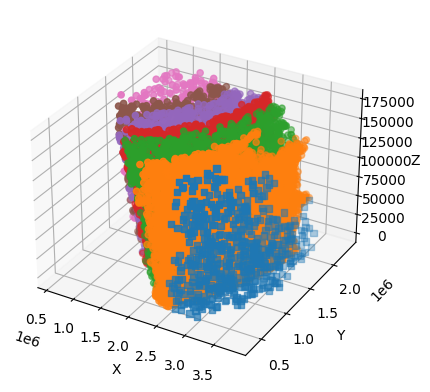

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, layer in [('s', 1),  ('o', 2),  ('o', 3),('o', 4),  ('o', 5),  ('o', 6), ('o', 7)]:
    
    nodeprex = []
    nodeprez = []       
    nodeprey = [] 
    nodepremtype = []    
    for gid in range(len(ind_cell_df['x'])): 
        if ind_cell_df['layer'][gid] == layer:
            nodeprex.append(ind_cell_df['x'][gid])
            nodeprey.append(ind_cell_df['y'][gid])
            nodeprez.append(ind_cell_df['z'][gid])
            nodepremtype.append(ind_cell_df['layer'][gid])
    
    ax.scatter(nodeprex, nodeprey, nodeprez, marker=m)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [8]:
print(np.mean(nodeprex),np.mean(nodeprey),np.mean(nodeprez))

1190795.8315132605 1912070.3775351015 84911.36817472699


In [9]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in range(len(ind_cell_df['x'])): 
    if ind_cell_df['linfo'][gid] == 4:    
        nodeprex.append(ind_cell_df['x'][gid])
        nodeprey.append(ind_cell_df['y'][gid])
        nodeprez.append(ind_cell_df['z'][gid])
        nodepremtype.append(ind_cell_df['linfo'][gid])
        
print("%.2f, %.2f, %.2f " % (np.mean(nodeprex)/1,np.mean(nodeprey)/1,np.mean(nodeprez)/1))

2210053.29, 1384712.45, 88637.93 


In [10]:
x0, y0, z0 = 2221024.05, 1390248.16, 87538.42 
x0, y0, z0

(2221024.05, 1390248.16, 87538.42)

In [11]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in range(len(ind_cell_df['x'])): 
    if ind_cell_df['linfo'][gid] == 6:    
        nodeprex.append(ind_cell_df['x'][gid])
        nodeprey.append(ind_cell_df['y'][gid])
        nodeprez.append(ind_cell_df['z'][gid])
        nodepremtype.append(ind_cell_df['linfo'][gid])
        
# print("%.2f %.2f %.2f " % (np.mean(nodeprex)/1000,np.mean(nodeprey)/1000,np.mean(nodeprez)/1000))
print("%.2f %.2f %.2f " % (np.mean(nodeprex)/1,np.mean(nodeprey)/1,np.mean(nodeprez)/1))

1496642.42 1709777.37 87956.34 


In [12]:
x6, y6, z6 = 1489618.28, 1696885.71, 86958.88 
x6, y6, z6

(1489618.28, 1696885.71, 86958.88)

In [13]:
vx, vy, vz = x0 - 1489618.28, y0 - 1696885.71, z0 - 86958.88
vx, vy, vz

(731405.7699999998, -306637.55000000005, 579.5399999999936)

In [14]:
t = -3.0366509823951766
xt, yt, zt = x0 + vx*t, y0+ vy*t, z0+ vz*t
xt, yt, zt

(0.0, 2321399.37744675, 85778.55928966272)

In [15]:
t = 2.5
xt2, yt2, zt2 = x0 + vx*t, y0+ vy*t, z0+ vz*t
xt2, yt2, zt2 

(4049538.474999999, 623654.2849999998, 88987.26999999999)

In [16]:
xxx = 1000.0*np.array([462.2683543371059,462.2683543371059,1149.931366648436,1149.931366648436,1158.159407138949,1158.159407138949])
yyy = 1000.0*np.array([2805.973374970087,2805.973374970087,2458.417758523231,2458.417758523231,2411.737892996198,2411.737892996198])

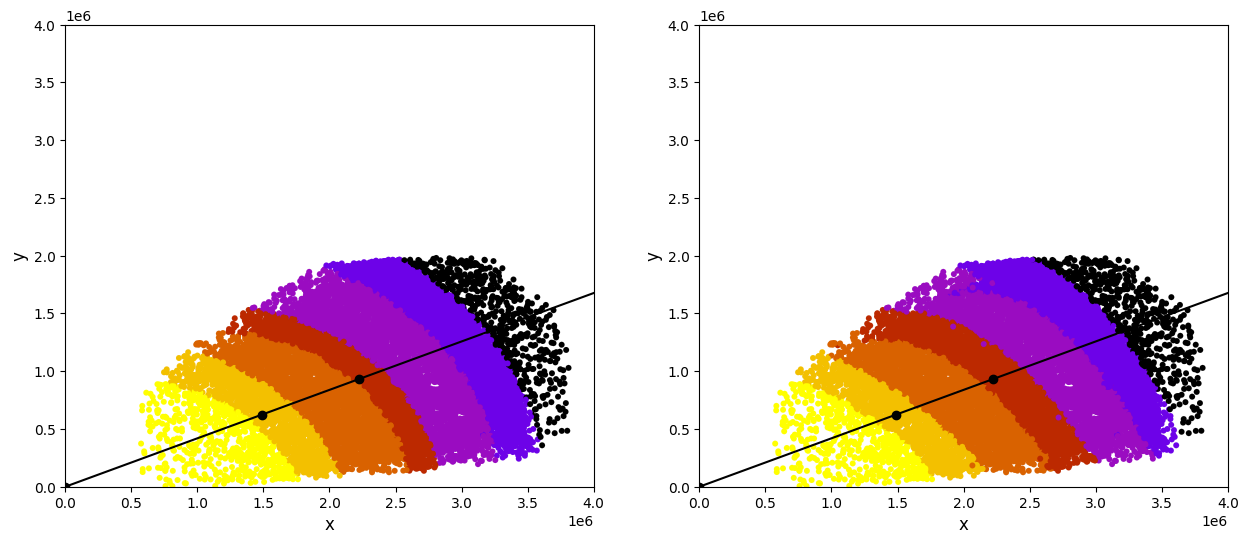

In [17]:
nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in range(len(ind_cell_df['x'])): 
    nodeprex.append(ind_cell_df['x'][gid])
    nodeprey.append(ind_cell_df['y'][gid])
    nodeprez.append(ind_cell_df['z'][gid])
    nodepremtype.append(ind_cell_df['layer'][gid])


# plot the results
fig=plt.figure(figsize=(15,6))

for ii,reg in enumerate(['xS1FL']):
    

    plt.subplot(1,2,1)
    plt.scatter(nodeprex,-1.0*np.array(nodeprey)+2321399.37744675, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.plot([xt,x6,x0,xt2],-1.0*np.array([yt-2321399.37744675,y6-2321399.37744675,y0-2321399.37744675,yt2-2321399.37744675]),'-ok')
    # plt.plot(xxx,yyy,'ob')
    plt.ylim(0, 4000000)
    plt.xlim(0, 4000000)

nodeprex = []
nodeprez = []       
nodeprey = [] 
nodepremtype = []    
for gid in range(len(ind_cell_df['x'])): 
    nodeprex.append(ind_cell_df['x'][gid])
    nodeprey.append(ind_cell_df['y'][gid])
    nodeprez.append(ind_cell_df['z'][gid])
    nodepremtype.append(ind_cell_df['linfo'][gid])


for ii,reg in enumerate(['xS1FL']):
    

    plt.subplot(1,2,2)
    plt.scatter(nodeprex,-1.0*np.array(nodeprey)+2321399.37744675, lw=0.05, s=18,
                c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.plot([xt,x6,x0,xt2],-1.0*np.array([yt-2321399.37744675,y6-2321399.37744675,y0-2321399.37744675,yt2-2321399.37744675]),'-ok')
    # plt.plot(xxx,yyy,'ob')
    plt.ylim(0, 4000000)
    plt.xlim(0, 4000000)



    # plt.subplot(1,3,2)
    # # plt.scatter(nodeprex,nodeprez, lw=0.05, s=18,
    # #             c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    # plt.xlabel('x', fontsize=12)
    # plt.ylabel('z', fontsize=12)
    # plt.plot([3942.8243701921465-xt,3560.8979394929374-xt,xt-xt],[-2463.3882640928678-zt,-2960.494375047068-zt,zt-zt],'-ok')


    # plt.subplot(1,3,3)
    # # plt.scatter(nodeprey,nodeprez, lw=0.05, s=18,
    # #             c=nodepremtype, cmap=plt.cm.get_cmap('gnuplot', 12))
    # plt.xlabel('y', fontsize=12)
    # plt.ylabel('z', fontsize=12)
    # plt.plot([-1247.624833014761-yt,-1153.0125370542862-yt,yt-yt],[-2463.3882640928678-zt,-2960.494375047068-zt,zt-zt],'-ok')

In [18]:
# Degrees: Approximately 67.23 degrees
# Radians: Approximately 1.17 radians
# (xt2-xt)/abs(yt2-yt)

In [19]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

In [20]:
gid = 0
nodeprex[gid], nodeprey[gid], nodeprez[gid], len(nodeprex)

(2079128, 1323232, 42240, 15567)

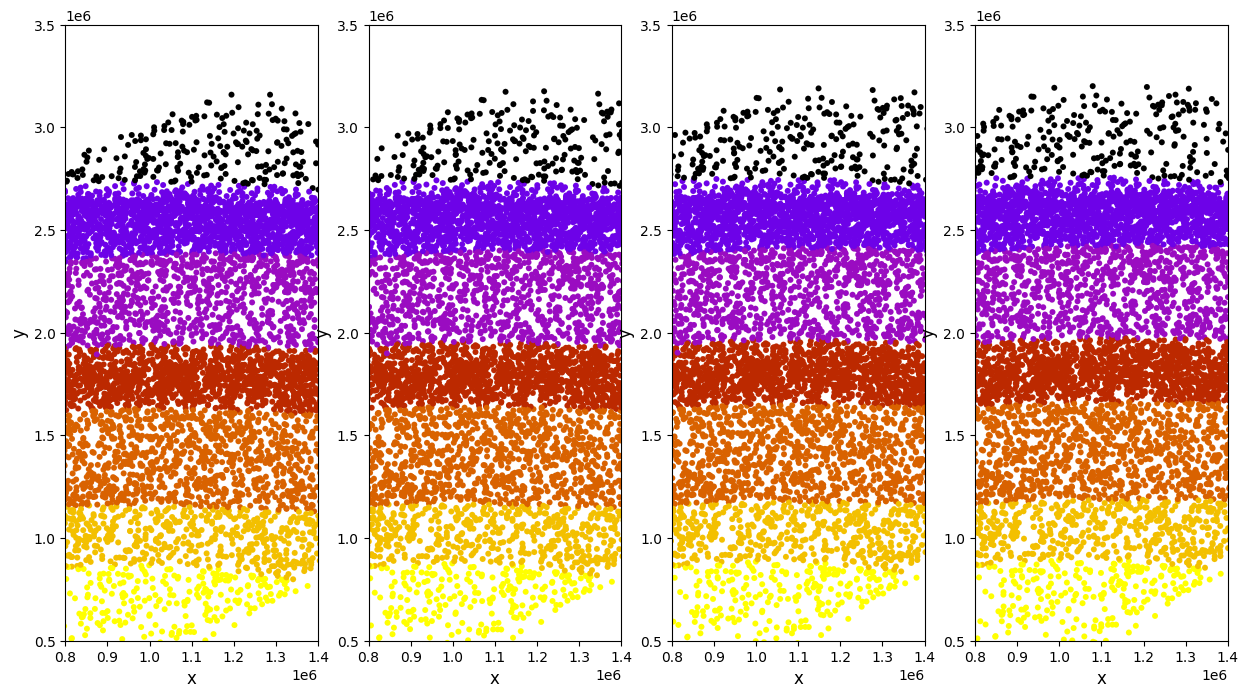

In [21]:
# plot the results
fig=plt.figure(figsize=(15,8))

for ii in range(4):

    nodeprex_new = []
    nodeprez_new = []       
    nodeprey_new = [] 
    nodepremtype_new = []    

    for gid in range(len(nodeprex)):
        
        x0, y0, z0 = nodeprex[gid], -nodeprey[gid]+2321399.37744675, nodeprez[gid]

        v, axis, theta = [x0, y0, z0], [0, 0, 1], 0.03*ii + 1.17 - 0.43
        M0 = M(axis, theta)
        vn = dot(M0,v)
            
        nodeprex_new.append(vn[0])
        nodeprey_new.append(vn[1])
        nodeprez_new.append(vn[2])
        nodepremtype_new.append(nodepremtype[gid])


    minx, miny, minz = min(nodeprex_new), min(nodeprey_new), min(nodeprez_new)
    minx, miny, minz


    plt.subplot(1,4,1+ii)
    plt.scatter(nodeprex_new - minx,nodeprey_new - miny, lw=0.05, s=18,
                c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.ylim(500000, 3500000)
    plt.xlim(800000, 1400000);


Text(0, 0.5, 'z')

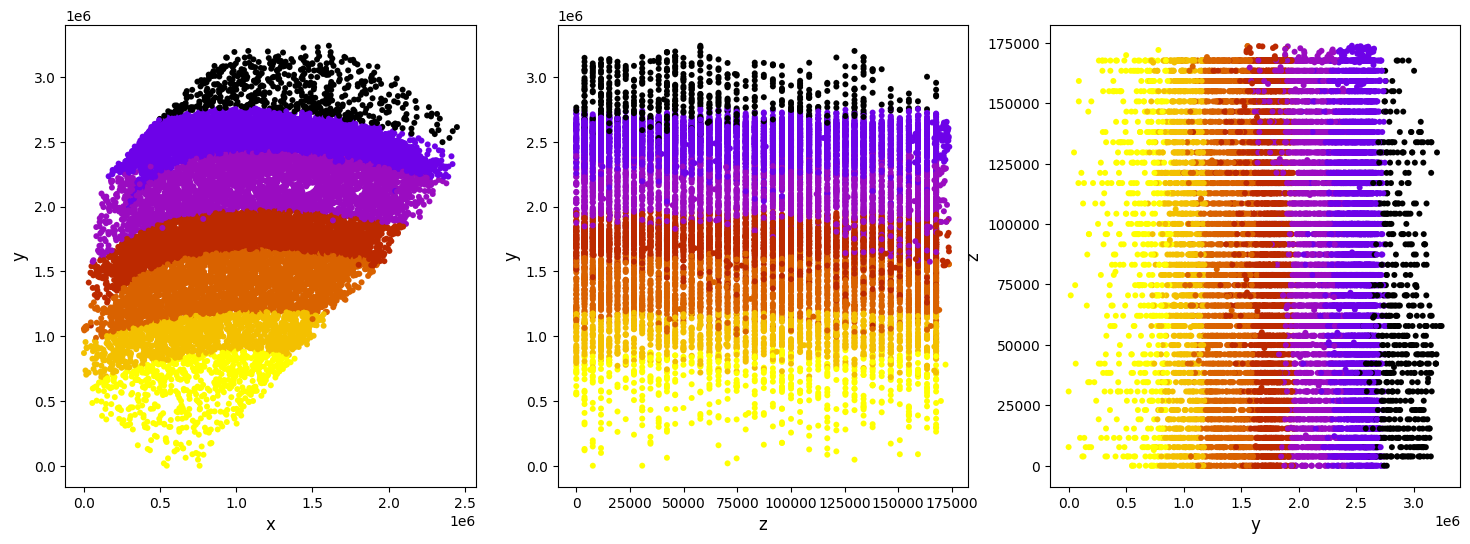

In [22]:
# plot the results
fig=plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.scatter(nodeprex_new-minx,nodeprey_new-miny, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,2)
plt.scatter(nodeprez_new-minz,nodeprey_new-miny, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('z', fontsize=12)
plt.ylabel('y', fontsize=12)


plt.subplot(1,3,3)
plt.scatter(nodeprey_new-miny,nodeprez_new-minz, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('y', fontsize=12)
plt.ylabel('z', fontsize=12)

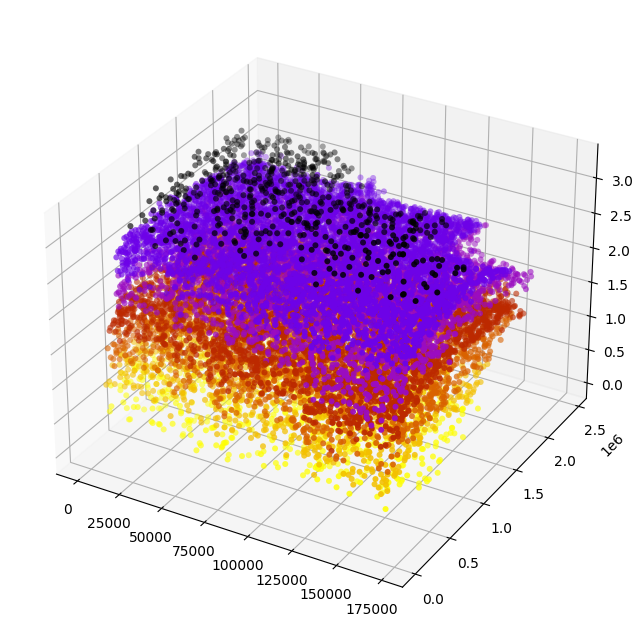

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(nodeprez_new-minz,nodeprex_new-minx,nodeprey_new-miny,lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))

In [24]:
x_new, y_new, z_new = nodeprex_new-minx, nodeprey_new-miny,nodeprez_new-minz

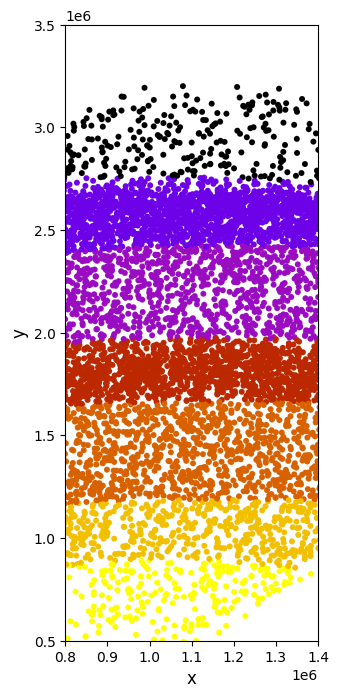

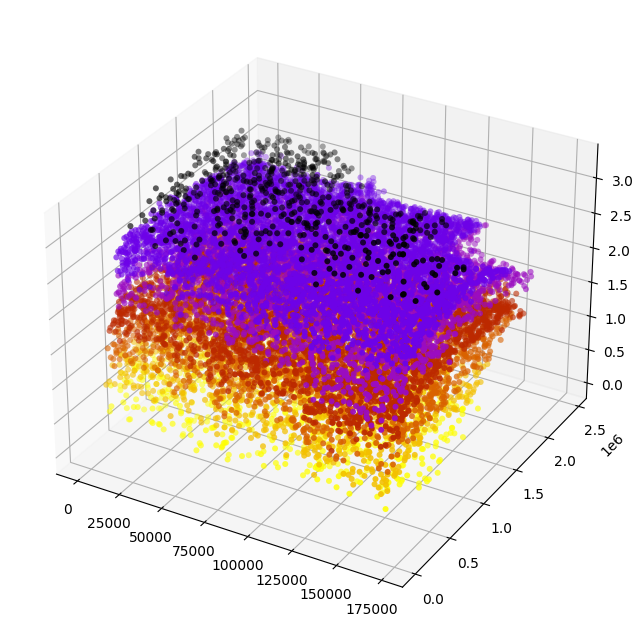

In [25]:
# plot the results
fig=plt.figure(figsize=(15,8))

plt.subplot(1,4,1+ii)
plt.scatter(x_new,y_new, lw=0.05, s=18,
                c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.ylim(500000, 3500000)
plt.xlim(800000, 1400000);


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_new, x_new, y_new, lw=0.05, s=18,
            c=nodepremtype_new, cmap=plt.cm.get_cmap('gnuplot', 12))


In [26]:
ind_cell_df.keys()

Index(['Unnamed: 0', 'agglo_seg', 'x', 'y', 'z', 'type', 'layer', 'linfo',
       'info'],
      dtype='object')

In [27]:
lll = []
lll2 = []
mtype = []
mtype2 = []
for id, nn in enumerate(list(ind_cell_df['info'].values)):
    if 'interneuron' in nn or nodepremtype_new[id]==1:
        lll2.append(nn)
        mtype.append('inhibitory')
        if nodepremtype_new[id]==2 or nodepremtype_new[id]==3:
            mtype2.append('L23I')
        else:
            mtype2.append('L'+str(nodepremtype_new[id])+'I')
    else:
        lll.append(nn)
        mtype.append('excitatory')    
        if nodepremtype_new[id]==2 or nodepremtype_new[id]==3:
            mtype2.append('L23E')
        else:
            mtype2.append('L'+str(nodepremtype_new[id])+'E')
        

In [28]:
np.unique(mtype2, return_counts=True)

(array(['L1I', 'L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I',
        'L7E', 'L7I'], dtype='<U4'),
 array([ 558, 4967, 2621, 2761,  702, 1784,  504,  960,  129,  478,  103]))

In [29]:
np.unique(mtype, return_counts=True)

(array(['excitatory', 'inhibitory'], dtype='<U10'), array([10950,  4617]))

In [30]:
nodes_new = pd.DataFrame({'id': list(ind_cell_df['agglo_seg'].values), 'x': list(ind_cell_df['x'].values), 'y': list(ind_cell_df['y'].values), 'z': list(ind_cell_df['z'].values),
                          'x_new': list(x_new), 'y_new': list(y_new), 'z_new': list(z_new),
                          'layer': list(ind_cell_df['linfo'].values), 'EI': list(mtype), 'mtype': list(mtype2),                          
                          'info': list(ind_cell_df['info'].values)}, index=list(range(len(x_new))))  

# nodes_new.to_hdf('nodes_new.h5', key='nodes_new', mode='w')  

In [31]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodes_new['x'][gidpre]-nodes_new['x'][gidpost],2)+np.power(nodes_new['y'][gidpre]-nodes_new['y'][gidpost],2)+np.power(nodes_new['z'][gidpre]-nodes_new['z'][gidpost],2))

In [32]:
def distance3D_new(gidpre,gidpost):
    return np.sqrt(np.power(nodes_new['x_new'][gidpre]-nodes_new['x_new'][gidpost],2)+np.power(nodes_new['y_new'][gidpre]-nodes_new['y_new'][gidpost],2)+np.power(nodes_new['z_new'][gidpre]-nodes_new['z_new'][gidpost],2))

In [33]:
node_distance3D = []    
for gid in range(len(nodeprex)):
    node_distance3D.append(distance3D(100,gid) - distance3D_new(100,gid))

In [34]:
max(node_distance3D), min(node_distance3D)

(4.656612873077393e-10, -9.313225746154785e-10)

In [35]:
mean_z = np.mean(z_new)
mean_x = 1100000.0
mean_x, mean_z

(1100000.0, 84327.02280465087)

In [36]:
def distance2Dmean(gidpre, mean_x, mean_z):
    return np.sqrt(np.power(nodes_new['x_new'][gidpre]-mean_x,2)+np.power(nodes_new['z_new'][gidpre]-mean_z,2))

In [37]:
distance2Dcenter = [distance2Dmean(gidpre, mean_x, mean_z) for gidpre in range(len(x_new))]

In [38]:
distance2Dcenter2 = np.array(distance2Dcenter)/1000.0
x_new2 = np.array(x_new)/1000.0
z_new2 = np.array(z_new)/1000.0
y_new2 = np.array(y_new)/1000.0
nodepremtype_new2 = np.array(nodepremtype_new)

In [39]:
d2d = 300
len(distance2Dcenter2[np.where(distance2Dcenter2 < d2d)])

5565

In [40]:
len(ind_cell_df['agglo_seg'].values), len(np.unique(ind_cell_df['agglo_seg'].values)), len(ind_cell_df['agglo_seg'].values) - len(np.unique(ind_cell_df['agglo_seg'].values))

(15567, 15567, 0)

In [41]:
nodes_new = pd.DataFrame({'id': list(ind_cell_df['agglo_seg'].values), 'x': list(ind_cell_df['x'].values), 'y': list(ind_cell_df['y'].values), 'z': list(ind_cell_df['z'].values),
                          'x_new': list(x_new2), 'y_new': list(y_new2), 'z_new': list(z_new2), 'distance2Dcenter': list(distance2Dcenter2),
                          'layer': list(ind_cell_df['linfo'].values), 'EI': list(mtype), 'mtype': list(mtype2),                          
                          'info': list(ind_cell_df['info'].values)}, index=list(range(len(x_new))))  

# nodes_new.to_hdf('nodes_new.h5', key='nodes_new', mode='w')  
# nodes_new = nodes_new.drop_duplicates(subset=['id'], keep='first')
nodes_new

,id,x,y,z,x_new,y_new,z_new,distance2Dcenter,layer,EI,mtype,info
0,3195297945,2079128,1323232,42240,908.725307,1690.221158,42.240,195.850263,4,excitatory,L4E,L4pyramidalneuron
1,4519199338,2090464,1369448,30720,950.479935,1667.396290,30.720,158.839424,4,excitatory,L4E,L4pyramidalneuron
2,4475878153,2054304,1372584,42240,928.390581,1638.596281,42.240,176.694964,5,excitatory,L5E,L5pyramidalneuron
3,3253775599,2037400,1313760,38400,873.574406,1665.821181,38.400,231.036450,4,excitatory,L4E,L4pyramidalneuron
4,3719255305,2066464,1284832,46080,871.842116,1706.791224,46.080,231.341425,4,excitatory,L4E,L4pyramidalneuron
...,...,...,...,...,...,...,...,...,...,...,...,...
15562,105024922427,2672384,2144896,172920,1915.431043,1573.482255,172.920,820.229542,4,excitatory,L4E,layer-unclassifiedneuronunclassified-neuron
15563,105039521672,2687904,2147840,170775,1928.077585,1582.948116,170.775,832.577768,4,excitatory,L4E,layer-unclassifiedneuronunclassified-neuron
15564,105068475750,2641824,2152448,171105,1900.379698,1545.834411,171.105,805.070232,4,excitatory,L4E,layer-unclassifiedneuronunclassified-neuron
15565,105268101673,1651712,2204224,172029,1270.384244,780.257337,172.029,191.630967,7,excitatory,L7E,layer-unclassifiedneuronunclassified-neuron


In [42]:
nodes_new['mtype'].value_counts()

mtype
L23E    4967
L4E     2761
L23I    2621
L5E     1784
L6E      960
L4I      702
L1I      558
L5I      504
L7E      478
L6I      129
L7I      103
Name: count, dtype: int64

In [43]:
nodes_new[nodes_new['distance2Dcenter'] < 300.0]['mtype'].value_counts()

mtype
L23E    1618
L4E      948
L23I     898
L5E      693
L6E      389
L1I      244
L4I      240
L7E      221
L5I      213
L6I       57
L7I       44
Name: count, dtype: int64

In [44]:
nodes_new[nodes_new['distance2Dcenter'] < 300.0]

,id,x,y,z,x_new,y_new,z_new,distance2Dcenter,layer,EI,mtype,info
0,3195297945,2079128,1323232,42240,908.725307,1690.221158,42.240,195.850263,4,excitatory,L4E,L4pyramidalneuron
1,4519199338,2090464,1369448,30720,950.479935,1667.396290,30.720,158.839424,4,excitatory,L4E,L4pyramidalneuron
2,4475878153,2054304,1372584,42240,928.390581,1638.596281,42.240,176.694964,5,excitatory,L5E,L5pyramidalneuron
3,3253775599,2037400,1313760,38400,873.574406,1665.821181,38.400,231.036450,4,excitatory,L4E,L4pyramidalneuron
4,3719255305,2066464,1284832,46080,871.842116,1706.791224,46.080,231.341425,4,excitatory,L4E,L4pyramidalneuron
...,...,...,...,...,...,...,...,...,...,...,...,...
15529,101966872869,2422208,1413760,169620,1207.065134,1882.295500,169.620,136.886212,4,inhibitory,L4I,layer-unclassifiedneuroninterneuron
15535,102200007236,2476128,1468416,172524,1283.786812,1885.198750,172.524,203.853622,4,excitatory,L4E,layer-unclassifiedneuronunclassified-neuron
15536,102228727723,2365984,1486336,169455,1222.677027,1791.826263,169.455,149.319876,4,excitatory,L4E,layer-unclassifiedneuronunclassified-neuronthi...
15565,105268101673,1651712,2204224,172029,1270.384244,780.257337,172.029,191.630967,7,excitatory,L7E,layer-unclassifiedneuronunclassified-neuron


In [45]:
nodes_new.to_csv('cell_positions_h01_rotated_full.csv')

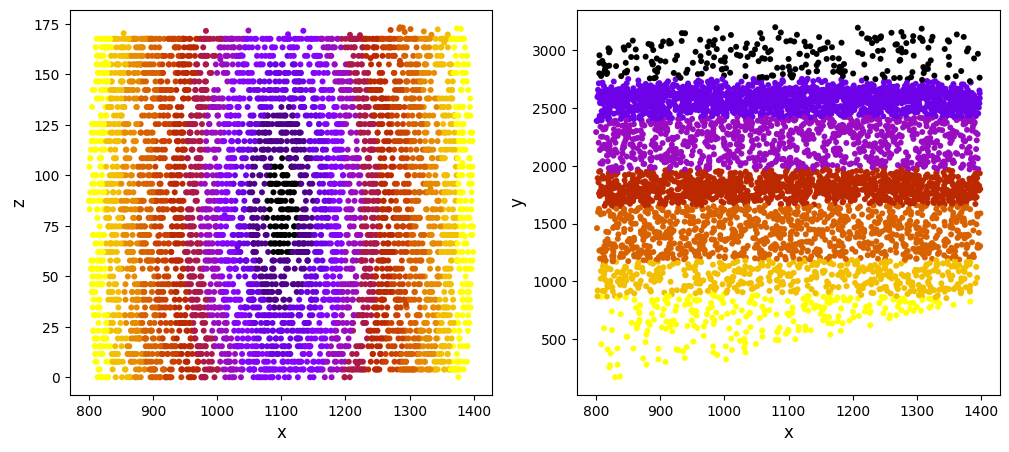

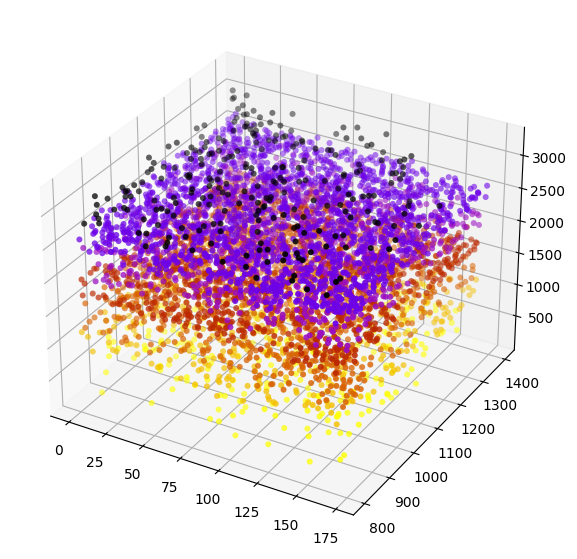

In [52]:
d2d = 300

# plot the results
fig=plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x_new2[np.where(distance2Dcenter2 < d2d)],z_new2[np.where(distance2Dcenter2 < d2d)], lw=0.05, s=18,
                c=distance2Dcenter2[np.where(distance2Dcenter2 < d2d)], cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('z', fontsize=12)
# plt.ylim(0, 2500000)
# plt.xlim(1000000, 1420000);

plt.subplot(1,2,2)
plt.scatter(x_new2[np.where(distance2Dcenter2 < d2d)],y_new2[np.where(distance2Dcenter2 < d2d)], lw=0.05, s=18,
                c=nodepremtype_new2[np.where(distance2Dcenter2 < d2d)], cmap=plt.cm.get_cmap('gnuplot', 12))
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
# plt.ylim(0, 2500000)
# plt.xlim(1000000, 1420000);

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(z_new2[np.where(distance2Dcenter2 < d2d)], x_new2[np.where(distance2Dcenter2 < d2d)],y_new2[np.where(distance2Dcenter2 < d2d)], lw=0.05, s=18,
            c=nodepremtype_new2[np.where(distance2Dcenter2 < d2d)], cmap=plt.cm.get_cmap('gnuplot', 12))


In [47]:
d2d = 300
len(nodes_new[nodes_new['distance2Dcenter'] < d2d]), len(nodes_new), len(nodes_new[nodes_new['distance2Dcenter'] < d2d])/len(nodes_new)

(5565, 15567, 0.35748699171323955)